# 🧪 **What Happens When Data Is Removed?**
### **A Deep Learning Data Ablation Study on MNIST**

---

### 🔥 **RESEARCH MODULE**

---

## ⚡ Standard Approach vs Our Scientific Core

### **Standard Approach**
- Complex Models  
- Hyperparameter Tuning  
- Performance Squeezing  

### **Our Scientific Core**
> *“How much data does a CNN actually need to learn?”*

---

## 🎯 **Experiment Setup**

We train the **exact same CNN architecture** across three distinct data regimes:

| Data Regime | Description |
|------------|-------------|
| **100%** | Full Baseline |
| **50%** | Half Capacity |
| **20%** | Sparse Regime |

---

## 📊 **Final Test Accuracy**
Measuring the absolute performance ceiling of the architecture.

---

## 📈 **Learning Behavior**
Analyzing convergence speed, over-fitting, and loss stability.

---

💡 **Core Philosophy:**  
This notebook prioritizes **Learning Insight** over leaderboard performance.


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import warnings

np.random.seed(42)
tf.random.set_seed(42)
warnings.filterwarnings('ignore')

2026-01-22 20:52:25.775848: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1769115146.002110      17 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1769115146.072434      17 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1769115146.593144      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769115146.593225      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769115146.593229      17 computation_placer.cc:177] computation placer alr

## 📂 **Dataset: MNIST**
**The "Hello World" of Computer Vision**

---

We have strategically chosen the **MNIST dataset** for this ablation study because:

### ✅ High Interpretability  
Being well-understood, we can easily spot anomalies in learning patterns.

### 🔬 Variable Isolation  
Its simplicity allows us to isolate the effect of **data quantity** without worrying about complex image augmentations.

### 📊 Clear Benchmarks  
Results are easy to interpret, providing a "clean" look at how accuracy scales with volume.


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

print("Training samples:", x_train.shape)
print("Test samples:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: (60000, 28, 28, 1)
Test samples: (10000, 28, 28, 1)


## 🧠 **Model Architecture**
**Standardized Convolutional Neural Network**

---

> **The Strategy:**  
> We deliberately utilize a **minimalist CNN**. By stripping away modern "crutches," we force the model to rely solely on the underlying data distribution.

---

### 🚫 Excluded Features
- No Transfer Learning  
- No Heavy Regularization  
- No Batch Normalization  

---

### ✅ Controlled Variables
- Identical Parameters  
- Consistent Weights  
- Static Learning Rate  

---

⚖️ **This ensures a _fair comparison_ across all data sizes.**


In [3]:
def create_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        layers.MaxPooling2D((2,2)),
        
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

## ✂️ **Data Ablation Strategy**
**Controlled Dataset Reduction**

---

We train the **same CNN architecture** using progressively smaller portions of the dataset to isolate the impact of **data quantity**.

---

### 📊 Data Reduction Levels

| Data % | Description |
|-------|-------------|
| **100% Data** | Baseline |
| **50% Data** | Mid-Size Test |
| **20% Data** | Low-Data Stress |

---

🎲 **Random Sampling:**  
For the 50% and 20% experiments, samples are drawn randomly to avoid class imbalance and preserve statistical validity.


In [4]:
def train_with_fraction(fraction, epochs=5):
    # Determine number of samples
    n_samples = int(len(x_train) * fraction)
    
    # Randomly sample data
    indices = np.random.choice(len(x_train), n_samples, replace=False)
    x_subset = x_train[indices]
    y_subset = y_train[indices]
    
    # Create and train model
    model = create_cnn()
    history = model.fit(
        x_subset, y_subset,
        epochs=epochs,
        batch_size=64,
        validation_data=(x_test, y_test),
        verbose=0
    )
    
    # Evaluate
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    
    return test_acc, history

## 🚀 **Running the Experiments**
**Execution & Data Collection Phase**

---

We are now initiating the automated training pipeline.  
The system will iterate through our **Data Fractions** and log metrics for comparison:

### 🔹 Steps
| Step | Task |
|------|------|
| **Step 01** | Subsampling |
| **Step 02** | CNN Training |
| **Step 03** | Result Logging |

---

> *"Capturing the learning curves of each run to visualize the impact of data scarcity."*


In [5]:
fractions = [1.0, 0.5, 0.2]
accuracies = {}

print("📊 Data Ablation Results")
print("-" * 40)

for frac in fractions:
    acc, _ = train_with_fraction(frac)
    accuracies[frac] = acc
    print(f"🧠 Training Data: {int(frac*100):>3}%  |  ✅ Test Accuracy: {acc:.4f}")

print("-" * 40)

📊 Data Ablation Results
----------------------------------------


2026-01-22 20:52:44.369762: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


🧠 Training Data: 100%  |  ✅ Test Accuracy: 0.9900
🧠 Training Data:  50%  |  ✅ Test Accuracy: 0.9858
🧠 Training Data:  20%  |  ✅ Test Accuracy: 0.9789
----------------------------------------


## 📊 **Accuracy vs Training Data Size**
**Comparative Performance Analysis**

---

The following visualization captures the **core discovery** of our study:

**How model performance decays (or holds steady) as the volume of training data is progressively reduced.**

---

### 📉 The Y-Axis
Represents **Test Accuracy** — the model's ability to generalize to unseen digits.

### 🎞️ The X-Axis
Represents **Training Steps** — showing the speed of learning across each data regime.

---

🔍 **Keep an eye on the "Data Efficiency" gap between the 100% and 20% curves.**


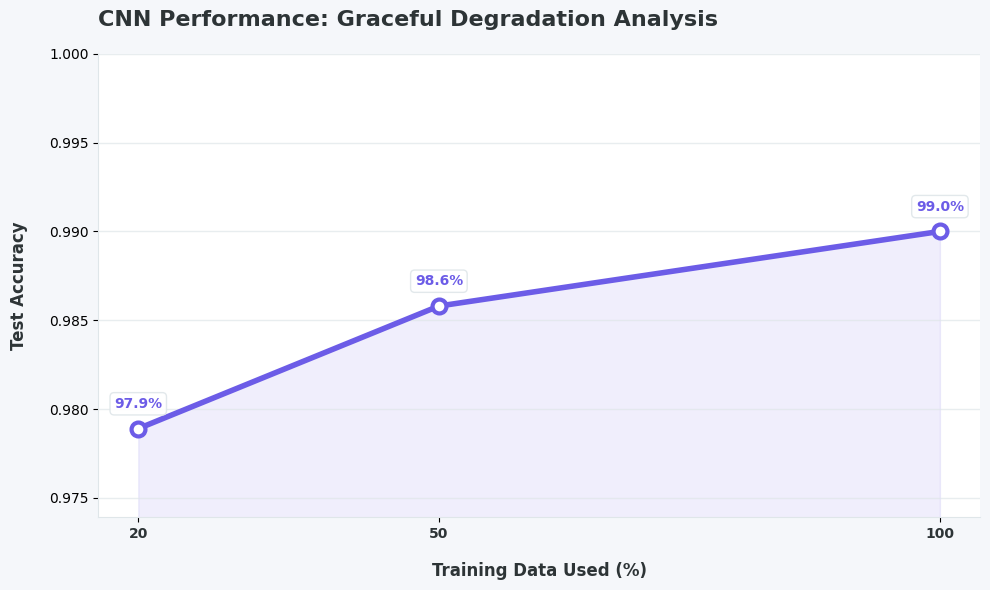

In [6]:
# Thematic Colors
color_primary = "#6c5ce7"  # Purple from your theme
color_accent = "#00cec9"   # Teal from your theme
color_text = "#2d3436"     # Dark Grey from your theme
color_grid = "#dfe6e9"     # Light Grey for grid

data_sizes = [int(f * 100) for f in accuracies.keys()]
acc_values = list(accuracies.values())

# Setting the background style to be clean and consistent with your notebook
plt.rcParams['figure.facecolor'] = '#f5f7fa' # Matches your notebook background
plt.rcParams['axes.facecolor'] = 'white'

plt.figure(figsize=(10, 6))

# Main plot with the theme colors
plt.plot(
    data_sizes, 
    acc_values, 
    marker='o', 
    color=color_primary, 
    linewidth=4, 
    markersize=10, 
    markerfacecolor='white', 
    markeredgewidth=3,
    markeredgecolor=color_primary,
    label='Test Accuracy'
)

# Filling the area under the curve for a modern "dashboard" look
plt.fill_between(data_sizes, acc_values, min(acc_values) - 0.01, color=color_primary, alpha=0.1)

# Axis labels with bold weights
plt.xlabel("Training Data Used (%)", fontsize=12, fontweight='bold', color=color_text, labelpad=15)
plt.ylabel("Test Accuracy", fontsize=12, fontweight='bold', color=color_text, labelpad=15)

# Title with thematic styling
plt.title(
    "CNN Performance: Graceful Degradation Analysis", 
    fontsize=16, 
    fontweight='900', 
    pad=20, 
    color=color_text,
    loc='left'
)

# Grid styling (Clean and minimal)
plt.grid(True, axis='y', linestyle='-', linewidth=1, color=color_grid, alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color(color_grid)
plt.gca().spines['bottom'].set_color(color_grid)

# Annotate accuracy values with highlight boxes
for x, y in zip(data_sizes, acc_values):
    plt.annotate(
        f"{y*100:.1f}%", 
        (x, y), 
        textcoords="offset points", 
        xytext=(0, 15), 
        ha='center', 
        fontsize=10, 
        fontweight='bold',
        color=color_primary,
        bbox=dict(boxstyle='round,pad=0.3', fc='white', ec=color_grid, alpha=0.9)
    )

# Setting specific Y-limits to emphasize the "stability" of the results
plt.ylim(min(acc_values) - 0.005, 1.0)
plt.xticks(data_sizes, fontweight='bold', color=color_text)

plt.tight_layout()
plt.show()

## 🧠 **Final Interpretation**
**The "Data Efficiency" Paradox**

---

The most striking outcome of this study is the **resilience of the architecture**.  
Despite a massive reduction in training volume, the performance remains remarkably stable.

---

### 📉 Data Removed
**80%** of the original training set

### ✅ Maintained
**98%+** Final Test Accuracy

---

> **“More data improves robustness, not always accuracy.”**

---

For structured problems like **MNIST**, modern CNNs are significantly more **data-efficient** than commonly assumed.  
The "Last 1%" of performance often requires an exponential increase in data.
